# Credit Risk Analysis - Exploratory Data Analysis

**Goal:** Understand the Lending Club dataset and identify key patterns in loan defaults.

**Dataset:** ~2.9M loan applications from 2007-2018

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

print("Libraries imported")

Libraries imported


## 2. Load the Data

**Note:** The full dataset has ~2.26M rows. Due to computational limitations, I used a random sample of 100k rows.

### How the sample was created (for reference):
```python
# This code was run once to create the sample - don't run again!
# df_temp = pd.read_csv('../data/accepted_2007_to_2018Q4.csv', 
#                       nrows=500000, 
#                       low_memory=False)
# df = df_temp.sample(n=100000, random_state=42)
# del df_temp
# df.to_csv('../data/sample_100k.csv', index=False)
```

The saved sample provides a representative subset across different years and loan characteristics.

In [2]:
df = pd.read_csv('../data/sample_100k.csv', low_memory=False)

print(f"Sample loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")

Sample loaded successfully!
Dataset shape: (100000, 151)
Rows: 100,000 | Columns: 151


## 3. Initial Data Exploration

In [3]:

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,62295679,NaN,3000.0,3000.0,3000.0,36 months,9.17,95.64,B,B2,Desktop Support Tech,3 years,RENT,40000.0,Not Verified,Oct-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,760xx,TX,6.78,0.0,Mar-1994,675.0,679.0,1.0,NaN,67.0,6.0,1.0,4522.0,30.0,20.0,w,0.0,0.0,3438.703295,3438.70,3000.00,438.70,0.0,0.00,0.0000,Jul-2018,379.75,NaN,...,5.0,6.0,NaN,0.0,0.0,1.0,70.0,25.0,1.0,0.0,15200.0,4522.0,10500.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,56060963,NaN,23100.0,23100.0,23100.0,36 months,12.69,774.89,C,C2,Product Technology Specialist,3 years,RENT,134000.0,Verified,Jul-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,201xx,MD,20.59,0.0,Aug-2003,695.0,699.0,0.0,68.0,NaN,11.0,0.0,17884.0,49.3,29.0,w,0.0,0.0,27810.476135,27810.48,23100.00,4710.48,0.0,0.00,0.0000,Mar-2018,3799.05,NaN,...,5.0,11.0,0.0,0.0,0.0,3.0,93.1,40.0,0.0,0.0,120178.0,87572.0,27500.0,83878.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,60485559,NaN,15600.0,15600.0,15600.0,36 months,7.89,488.06,A,A5,coating tech,10+ years,MORTGAGE,93000.0,Not Verified,Sep-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,238xx,VA,13.28,0.0,Aug-2000,690.0,694.0,1.0,45.0,NaN,15.0,0.0,8905.0,31.2,34.0,w,0.0,0.0,7383.420000,7383.42,5213.91,1138.98,0.0,1030.53,185.4954,Oct-2016,488.06,NaN,...,7.0,15.0,0.0,0.0,0.0,5.0,94.1,33.3,0.0,0.0,308821.0,38190.0,16900.0,34758.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,60831266,NaN,12000.0,12000.0,12000.0,36 months,7.26,371.96,A,A4,Software Engineer,2 years,MORTGAGE,122000.0,Not Verified,Sep-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,604xx,IL,20.63,0.0,Oct-2004,680.0,684.0,1.0,NaN,NaN,13.0,0.0,29537.0,69.0,25.0,w,0.0,0.0,12890.099565,12890.10,12000.00,890.10,0.0,0.00,0.0000,Dec-2016,8035.17,NaN,...,7.0,13.0,0.0,0.0,0.0,3.0,100.0,100.0,0.0,0.0,393452.0,83049.0,30500.0,66770.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 151 entries, id to settlement_term
dtypes: float64(113), int64(1), object(37)
memory usage: 115.2+ MB


In [5]:

df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,...,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,1.000000e+05,0.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,99955.000000,100000.00000,100000.000000,100000.000000,100000.000000,50122.000000,17286.000000,100000.00000,100000.000000,100000.000000,99945.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,28213.000000,100000.0,2.576000e+03,2575.000000,100000.000000,100000.000000,1.000000e+05,20071.00000,20071.000000,20071.000000,20071.000000,19306.000000,20071.000000,16826.000000,20071.000000,20071.000000,20071.000000,...,100000.000000,100000.000000,99047.000000,24697.000000,89051.000000,34724.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,95630.000000,100000.000000,100000.000000,100000.000000,100000.000000,98935.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2428.000000,2473.000000,2473.000000,2473.000000,2473.000000,796.000000,532.0,532.000000,532.0,532.000000,434.000000,532.000000,532.000000,2349.000000,2349.000000,2349.000000
mean,6.580875e+07,NaN,15393.710750,15393.710750,15387.950750,12.572447,446.708102,7.688009e+04,19.211298,0.32866,695.865450,699.865660,0.558390,34.495132,68.192063,11.89348,0.226550,17402.314000,52.194212,25.071770,2176.584359,2175.945773,14464.635682,14459.151493,11465.801815,2789.929968,1.713397,207.190500,37.045398,3974.243583,681.161660,666.400550,0.019440,43.995321,1.0,1.242343e+05,19.591017,0.005170,249.071560,1.404080e+05,0.95222,2.656171,0.667829,1.524887,21.732259,34177.953914,68.354511,1.285287,2.745852,5738.910817,...,8.111670,1.644200,24.711692,40.102685,6.838856,36.180826,0.515420,3.727530,5.786060,4.825090,8.008970,8.542350,8.410440,14.622810,5.734170,11.844370,0.000586,0.003480,0.092160,2.160440,94.049458,45.119358,0.133840,0.062340,1.750538e+05,51949.913200,22700.952430,43663.602250,34318.120906,669.561262,673.561262,0.625152,1.560049,11.646987,57.585214,2.939345,12.791751,0.046907,0.076425,35.814070,3.0,133.214079,3.0,14.530075,402.964562,10281.610451,192.657425,4960.530856,47.316147,12.956152
std

## 4. Target Variable Analysis (Loan Status)

Distribution of loan status:

In [6]:
print(df['loan_status'].value_counts())
print("\nPercentages:")
print(df['loan_status'].value_counts(normalize=True) * 100)

loan_status
Fully Paid            62332
Current               20801
Charged Off           15931
Late (31-120 days)      616
In Grace Period         205
Late (16-30 days)       114
Default                   1
Name: count, dtype: int64

Percentages:
loan_status
Fully Paid            62.332
Current               20.801
Charged Off           15.931
Late (31-120 days)     0.616
In Grace Period        0.205
Late (16-30 days)      0.114
Default                0.001
Name: proportion, dtype: float64


Visualization of loan status:

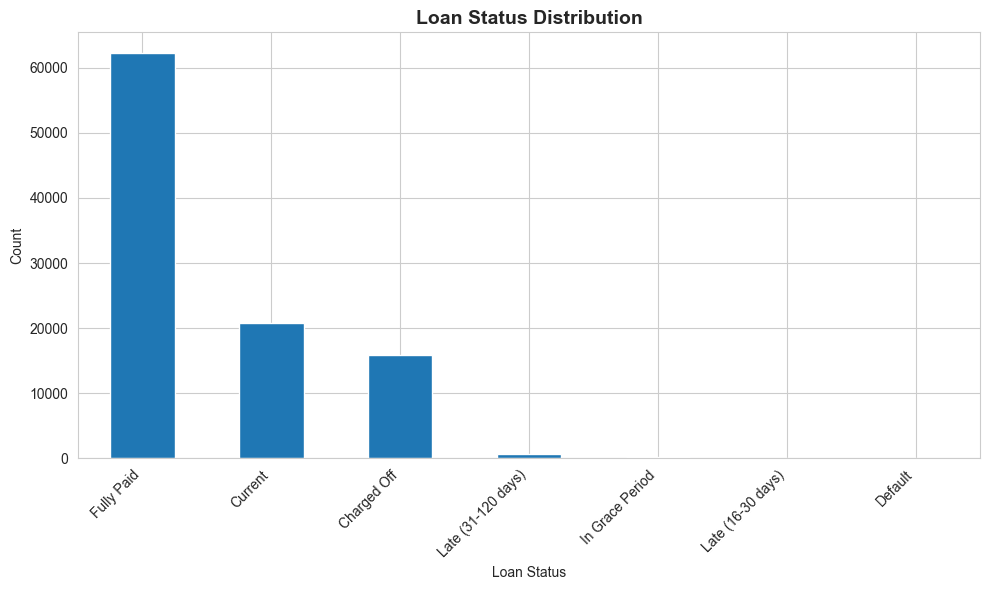

In [7]:

plt.figure(figsize=(10, 6))
df['loan_status'].value_counts().plot(kind='bar')
plt.title('Loan Status Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. Missing Data Analysis

In [8]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})

missing_df[missing_df['Missing_Count'] > 0].sort_values('Percentage', ascending=False).head(20)

,Missing_Count,Percentage
member_id,100000,100.000
desc,99990,99.990
orig_projected_additional_accrued_interest,99566,99.566
hardship_dpd,99468,99.468
hardship_reason,99468,99.468
hardship_status,99468,99.468
deferral_term,99468,99.468
hardship_amount,99468,99.468
hardship_start_date,99468,99.468
hardship_end_date,99468,99.468


There are many mising values. This may be due to the fact that some columns are introduced in later years or not released to the public to protect customer privacy.

## 6. Key Features to Explore

Important features include:
- `loan_amnt` - Loan amount
- `int_rate` - Interest rate
- `grade` - Loan grade
- `annual_inc` - Annual income
- `dti` - Debt-to-income ratio
- `fico_range_low`, `fico_range_high` - FICO scores
- `emp_length` - Employment length
- `home_ownership` - Home ownership status

In [9]:
# List all available columns
print("Available columns:")
print(df.columns.tolist())

Available columns:
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint'